# Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# display all columns
pd.set_option('display.max_columns', None)

# Import Data

In [3]:
# import data
weather = pd.read_csv('../data/processed/model_weather.csv')
event = pd.read_csv('../data/processed//model_event.csv')
noise_event = pd.read_csv('../data/processed//model_export41_noise_event.csv')
noise_measurement = pd.read_csv('../data/processed/export40_noise_measurements.csv')

# import export 42 data
noise_measurement_2 = pd.read_csv('../data/processed/export42_update.csv')
cols = ['#object_id','result_timestamp','day','hour','lamax','laeq']
noise_measurement_2 = noise_measurement_2[cols]

In [4]:
# standardize column names
event = event.rename(columns={'date': 'DATEUTC'})
noise_event = noise_event.rename(columns={'hourly_timestamp':'DATEUTC'})
noise_measurement = noise_measurement.rename(columns={'result_timestamp':'DATEUTC'})
noise_measurement_2 = noise_measurement_2.rename(columns={'result_timestamp':'DATEUTC'})

# Merge Data

In [5]:
# check shape of tables
dataframes = {'weather':weather,
             'event':event,
             'noise_event':noise_event,
             'noise_measurement':noise_measurement,
             'noise_measurement_2':noise_measurement_2}
for name,df in dataframes.items():
    print(f"Shape of {name}: {df.shape}")

Shape of weather: (8760, 10)
Shape of event: (8760, 2)
Shape of noise_event: (23780, 8)
Shape of noise_measurement: (50320, 20)
Shape of noise_measurement_2: (2964, 6)


In [6]:
# combine tables with noise events
df_noise_final = noise_measurement.merge(weather,on='DATEUTC').merge(event,on='DATEUTC')\
.merge(noise_event,on=['DATEUTC','description'],how='left') # left outer join

In [7]:
df_noise_final.shape

(50320, 36)

In [8]:
df_noise_final

,#object_id,description,DATEUTC,laf005_per_hour,laf01_per_hour,laf05_per_hour,laf10_per_hour,laf25_per_hour,laf50_per_hour,laf75_per_hour,laf90_per_hour,laf95_per_hour,laf98_per_hour,laf99_per_hour,laf995_per_hour,result_date,result_hour,result_dayofweek,result_isoweek,result_month,Temperature,LC_HUMIDITY,LC_RAININ,LC_RAD60,LC_WINDSPEED,Date,Month,Day,Hour,break,class_human,class_music,class_transport,class_unsupported,class_wind,event_count
0,255439,MP 01: Naamsestraat 35 Maxim,2022-07-03 13:00:00,65.4,64.0,60.5,58.0,54.4,51.1,49.0,47.4,46.4,45.2,44.8,44.0,2022-07-03,13,7,26,7,5.936130,43.121951,0.0,269.0,1.090000,07/03/2022,3,7,13,1,0.0,0.0,4.0,1.0,0.0,5.0
1,255440,MP 02: Naamsestraat 57 Xior,2022-07-03 13:00:00,69.8,69.4,66.0,63.4,58.3,54.6,51.5,49.5,48.7,47.9,47.5,46.9,2022-07-03,13,7,26,7,5.936130,43.121951,0.0,269.0,1.090000,07/03/2022,3,7,13,1,NaN,NaN,NaN,NaN,NaN,NaN
2,255441,MP 03: Naamsestraat 62 Taste,2022-07-03 13:00:00,72.8,70.5,65.5,63.2,60.0,56.6,53.3,50.7,49.8,49.1,48.6,48.2,2022-07-03,13,7,26,7,5.936130,43.121951,0.0,269.0,1.090000,07/03/2022,3,7,13,1,NaN,NaN,NaN,NaN,NaN,NaN
3,255442,MP 05: Calvariekapel KU Leuven,2022-07-03 13:00:00,73.5,71.8,66.8,64.4,60.6,55.3,50.5,47.1,45.3,43.3,41.9,41.1,2022-07-03,13,7,26,7,5.936130,43.121951,0.0,269.0,1.090000,07/03/2022,3,7,13,1,0.0,0.0,0.0,1.0,0.0,1.0
4,255443,MP 06: Parkstraat 2 La Filosovia,2022-07-03 13:00:00,74.5,71.9,66.4,63.3,59.5,55.3,51.4,48.4,46.7,45.0,43.7,43.1,2022-07-03,13,7,26,7,5.936130,43.121951,0.0,269.0,1.090000,07/03/2022,3,7,13,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50315,255442,MP 05: Calvariekapel KU Leuven,2022-12-31 23:00:00,77.7,74.7,67.2,64.6,60.4,55.5,51.3,48.0,46.3,44.7,43.7,42.7,2022-12-31,23,6,52,12,16.528619,52.166667,0.0,0.0,1.316905,31/12/2022,12,31,23,1,2.0,0.0,0.0,8.0,0.0,10.0
50316,255443,MP 06: Parkstraat 2 La Filosovia,2022-12-31 23:00:00,73.6,71.1,65.4,63.0,59.1,54.6,50.4,47.2,45.5,43.9,43.2,42.6,2022-12-31,23,6,52,12,16.528619,52.166667,0.0,0.0,1.316905,31/12/2022,12,31,23,1,1.0,0.0,0.0,1.0,0.0,2.0
50317,255444,MP 07: Naamsestraat 81,2022-12-31 23:00:00,71.3,69.2,64.1,61.7,57.4,52.1,47.5,44.2,42.7,41.2,40.3,39.6,2022-12-31,23,6,52,12,16.528619,52.166667,0.0,0.0,1.316905,31/12/2022,12,31,23,1,0.0,0.0,0.0,1.0,0.0,1.0
50318,280324,MP08bis - Vrijthof,2022-12-31 23:00:00,70.7,68.5,63.9,62.1,59.6,57.5,55.9,54.6,53.9,53.2,52.7,52.2,2022-12-31,23,6,52,12,16.528619,52.166667,0.0,0.0,1.316905,31/12/2022,12,31,23,1,NaN,NaN,NaN,NaN,NaN,NaN


# Data Types and Column Selection

In [9]:
drop_cols = ['Date','Month','Hour','Day','result_date','result_isoweek']
df_noise_final.drop(columns=drop_cols,inplace=True)

In [10]:
obj_cols = ['#object_id']

for c in obj_cols:
    df_noise_final[c] = df_noise_final[c].astype(str)

In [11]:
df_noise_final['DATEUTC'] = pd.to_datetime(df_noise_final['DATEUTC'])

In [12]:
df_noise_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50320 entries, 0 to 50319
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   #object_id         50320 non-null  object        
 1   description        50320 non-null  object        
 2   DATEUTC            50320 non-null  datetime64[ns]
 3   laf005_per_hour    50320 non-null  float64       
 4   laf01_per_hour     50320 non-null  float64       
 5   laf05_per_hour     50320 non-null  float64       
 6   laf10_per_hour     50320 non-null  float64       
 7   laf25_per_hour     50320 non-null  float64       
 8   laf50_per_hour     50320 non-null  float64       
 9   laf75_per_hour     50320 non-null  float64       
 10  laf90_per_hour     50320 non-null  float64       
 11  laf95_per_hour     50320 non-null  float64       
 12  laf98_per_hour     50320 non-null  float64       
 13  laf99_per_hour     50320 non-null  float64       
 14  laf995

# Noise Measurements EDA

In [13]:
# merge noise measurements 40 and 42
noise_event_measurement_both = pd.merge(noise_measurement,noise_measurement_2,
                                        on=['DATEUTC','#object_id'],
                                        )

In [14]:
noise_event_measurement_both.head()

,#object_id,description,DATEUTC,laf005_per_hour,laf01_per_hour,laf05_per_hour,laf10_per_hour,laf25_per_hour,laf50_per_hour,laf75_per_hour,laf90_per_hour,laf95_per_hour,laf98_per_hour,laf99_per_hour,laf995_per_hour,result_date,result_hour,result_dayofweek,result_isoweek,result_month,day,hour,lamax,laeq
0,255441,MP 03: Naamsestraat 62 Taste,2022-01-03 00:00:00,70.4,67.9,61.5,58.4,53.9,50.0,47.1,45.5,45.0,44.5,44.2,43.9,2022-01-03,0,1,1,1,3,0,79.8,46.224639
1,255441,MP 03: Naamsestraat 62 Taste,2022-01-03 01:00:00,67.3,65.2,59.7,56.8,52.5,49.0,46.7,45.6,45.0,44.5,44.3,44.0,2022-01-03,1,1,1,1,3,1,71.5,45.886306
2,255441,MP 03: Naamsestraat 62 Taste,2022-01-03 02:00:00,65.2,63.1,56.6,53.3,49.4,46.7,45.4,44.6,44.2,43.8,43.6,43.4,2022-01-03,2,1,1,1,3,2,71.5,45.069417
3,255441,MP 03: Naamsestraat 62 Taste,2022-01-03 03:00:00,67.8,65.0,58.9,56.1,51.3,47.4,45.7,44.9,44.4,44.0,43.7,43.5,2022-01-03,3,1,1,1,3,3,56.7,44.824250
4,255441,MP 03: Naamsestraat 62 Taste,2022-01-03 04:00:00,61.4,59.5,54.6,52.2,49.1,46.8,45.5,44.7,44.3,43.9,43.6,43.4,2022-01-03,4,1,1,1,3,4,70.7,45.137583


In [15]:
noise_event_measurement_both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 909
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #object_id        910 non-null    int64  
 1   description       910 non-null    object 
 2   DATEUTC           910 non-null    object 
 3   laf005_per_hour   910 non-null    float64
 4   laf01_per_hour    910 non-null    float64
 5   laf05_per_hour    910 non-null    float64
 6   laf10_per_hour    910 non-null    float64
 7   laf25_per_hour    910 non-null    float64
 8   laf50_per_hour    910 non-null    float64
 9   laf75_per_hour    910 non-null    float64
 10  laf90_per_hour    910 non-null    float64
 11  laf95_per_hour    910 non-null    float64
 12  laf98_per_hour    910 non-null    float64
 13  laf99_per_hour    910 non-null    float64
 14  laf995_per_hour   910 non-null    float64
 15  result_date       910 non-null    object 
 16  result_hour       910 non-null    int64  
 1

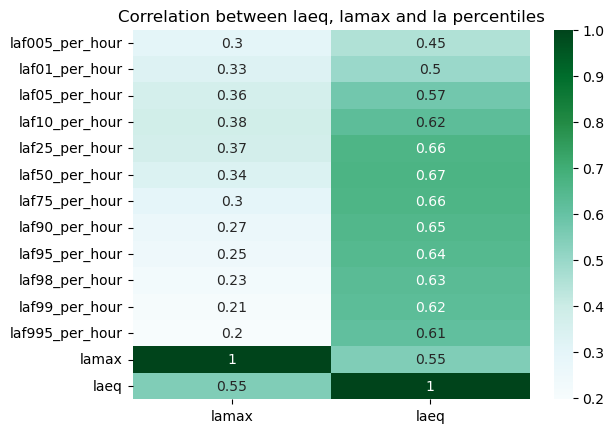

In [16]:
# plot correlation matrix of different noise measures
cols = [c for c in noise_event_measurement_both.columns if 'la' in c]
corr = noise_event_measurement_both[cols].corr()[['lamax','laeq']]
sns.heatmap(corr,annot=True,cmap="BuGn")
plt.title('Correlation between laeq, lamax and la percentiles')
plt.show()

Text(0, 0.5, 'db(A)')

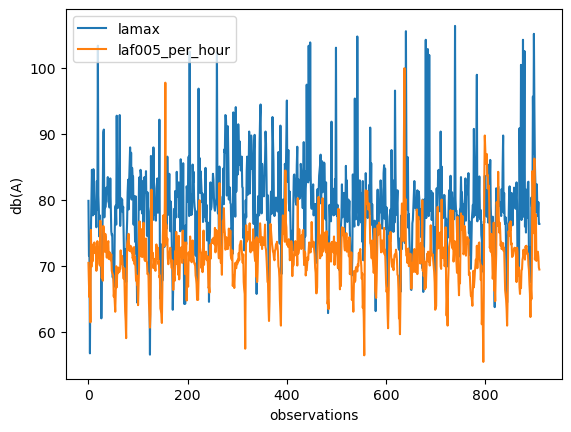

In [17]:
cols = ['lamax','laf005_per_hour']
noise_event_measurement_both[cols].plot()
plt.xlabel('observations')
plt.ylabel('db(A)')

Text(0, 0.5, 'db(A)')

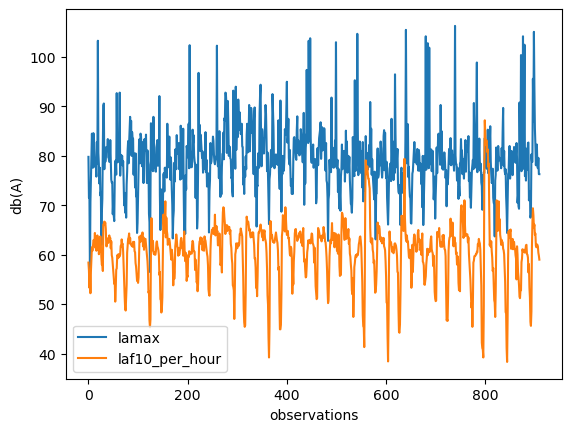

In [18]:
cols = ['lamax','laf10_per_hour']
noise_event_measurement_both[cols].plot()
plt.xlabel('observations')
plt.ylabel('db(A)')

Text(0, 0.5, 'db(A)')

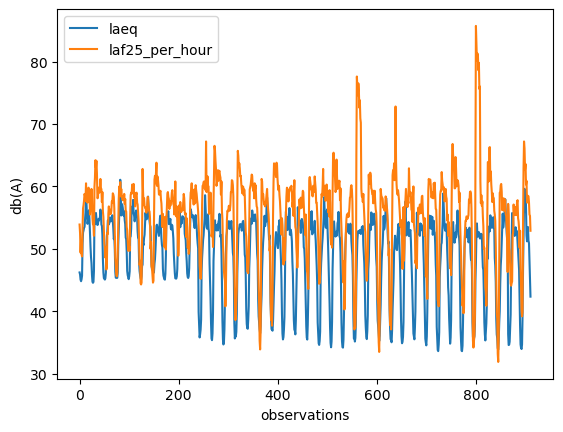

In [19]:
cols = ['laeq','laf25_per_hour']
noise_event_measurement_both[cols].plot()
plt.xlabel('observations')
plt.ylabel('db(A)')

Text(0, 0.5, 'db(A)')

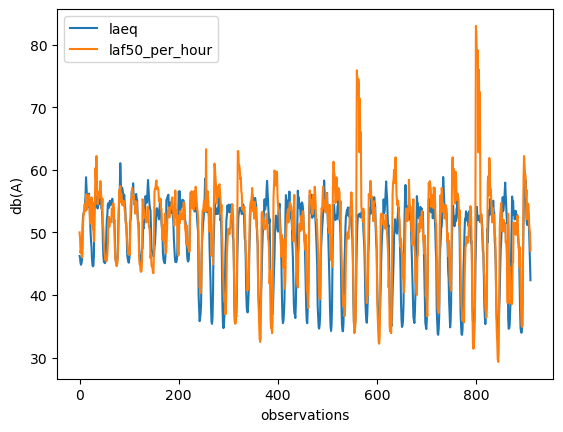

In [20]:
cols = ['laeq','laf50_per_hour']
noise_event_measurement_both[cols].plot()
plt.xlabel('observations')
plt.ylabel('db(A)')

# Feature Engineering

In [21]:
model_data = df_noise_final.copy()

In [22]:
# create new categorical variable day_category
# Define a custom function to assign the time category based on the hour
def assign_day_category(hour):
    if 7 <= hour <= 18:
        return 'day'
    elif 19 <= hour <= 22:
        return 'evening'
    else:
        return 'night'

# Define a custom function to assign the time category based on the hour
def assign_week_category(day):
    if 1 <= day <= 5:
        return 'weekday'
    else:
        return 'weekend'

# Apply the function to create the new 'day_category' column based on the 'result_hour' column
model_data['day_category'] = model_data['result_hour'].apply(assign_day_category)

# Apply the function to create the new 'week_category' column based on the 'result_dayofweek' column
model_data['week_category'] = model_data['result_dayofweek'].apply(assign_week_category)

# create new column 'season' from 'DATEUTC'
model_data['season'] = model_data['result_month'].apply(lambda x: (x%12 + 3)//3)
model_data['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}, inplace=True)

In [23]:
# Onehot encoding categorical columns
ohe_cols = ['description','result_dayofweek','result_hour','result_month',
           'day_category','week_category','season',]
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(model_data[ohe_cols]).toarray() # convert the sparse matrix to array

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(ohe_cols))
df_encoded = pd.concat([model_data, encoded_df], axis=1)

# drop the already encoded original columns
df_encoded.drop(columns=ohe_cols,inplace=True)
df_encoded.head()

,#object_id,DATEUTC,laf005_per_hour,laf01_per_hour,laf05_per_hour,laf10_per_hour,laf25_per_hour,laf50_per_hour,laf75_per_hour,laf90_per_hour,laf95_per_hour,laf98_per_hour,laf99_per_hour,laf995_per_hour,Temperature,LC_HUMIDITY,LC_RAININ,LC_RAD60,LC_WINDSPEED,break,class_human,class_music,class_transport,class_unsupported,class_wind,event_count,description_MP 01: Naamsestraat 35 Maxim,description_MP 02: Naamsestraat 57 Xior,description_MP 03: Naamsestraat 62 Taste,description_MP 04: His & Hears,description_MP 05: Calvariekapel KU Leuven,description_MP 06: Parkstraat 2 La Filosovia,description_MP 07: Naamsestraat 81,description_MP08bis - Vrijthof,result_dayofweek_1,result_dayofweek_2,result_dayofweek_3,result_dayofweek_4,result_dayofweek_5,result_dayofweek_6,result_dayofweek_7,result_hour_0,result_hour_1,result_hour_2,result_hour_3,result_hour_4,result_hour_5,result_hour_6,result_hour_7,result_hour_8,result_hour_9,result_hour_10,result_hour_11,result_hour_12,result_hour_13,result_hour_14,result_hour_15,result_hour_16,result_hour_17,result_hour_18,result_hour_19,result_hour_20,result_hour_21,result_hour_22,result_hour_23,result_month_1,result_month_2,result_month_3,result_month_4,result_month_5,result_month_6,result_month_7,result_month_8,result_month_9,result_month_10,result_month_11,result_month_12,day_category_day,day_category_evening,day_category_night,week_category_weekday,week_category_weekend,season_Autumn,season_Spring,season_Summer,season_Winter
0,255439,2022-07-03 13:00:00,65.4,64.0,60.5,58.0,54.4,51.1,49.0,47.4,46.4,45.2,44.8,44.0,5.93613,43.121951,0.0,269.0,1.09,1,0.0,0.0,4.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,255440,2022-07-03 13:00:00,69.8,69.4,66.0,63.4,58.3,54.6,51.5,49.5,48.7,47.9,47.5,46.9,5.93613,43.121951,0.0,269.0,1.09,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,255441,2022-07-03 13:00:00,72.8,70.5,65.5,63.2,60.0,56.6,53.3,50.7,49.8,49.1,48.6,48.2,5.93613,43.121951,0.0,269.0,1.09,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,255442,2022-07-03 13:00:00,73.5,71.8,66.8,64.4,60.6,55.3,50.5,47.1,45.3,43.3,41.9,41.1,5.93613,43.121951,0.0,269.0,1.09,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,255443,2022-07-03 13:00:00,74.5,71.9,66.4,63.3,59.5,55.3,51.4,48.4,46.7,45.0,43.7,43.1,5.93613,43.121951,0.0,269.0,1.09,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Check Correlations

In [25]:
num_cols = list(df_encoded.select_dtypes(include=['number']).columns)

In [26]:
correlation_data = df_encoded[num_cols].corr().loc["laf50_per_hour"].sort_values(ascending=False)

In [27]:
laf_cols = [c for c in num_cols if 'laf' in c]
correlation_data = correlation_data.drop(laf_cols)

In [28]:
correlation_data

day_category_day                  0.460277
LC_RAD60                          0.274450
LC_WINDSPEED                      0.242961
event_count                       0.232393
class_transport                   0.210501
                                    ...   
result_hour_3                    -0.246849
result_hour_5                    -0.263940
result_hour_4                    -0.265846
description_MP08bis - Vrijthof   -0.308758
day_category_night               -0.598363
Name: laf50_per_hour, Length: 72, dtype: float64

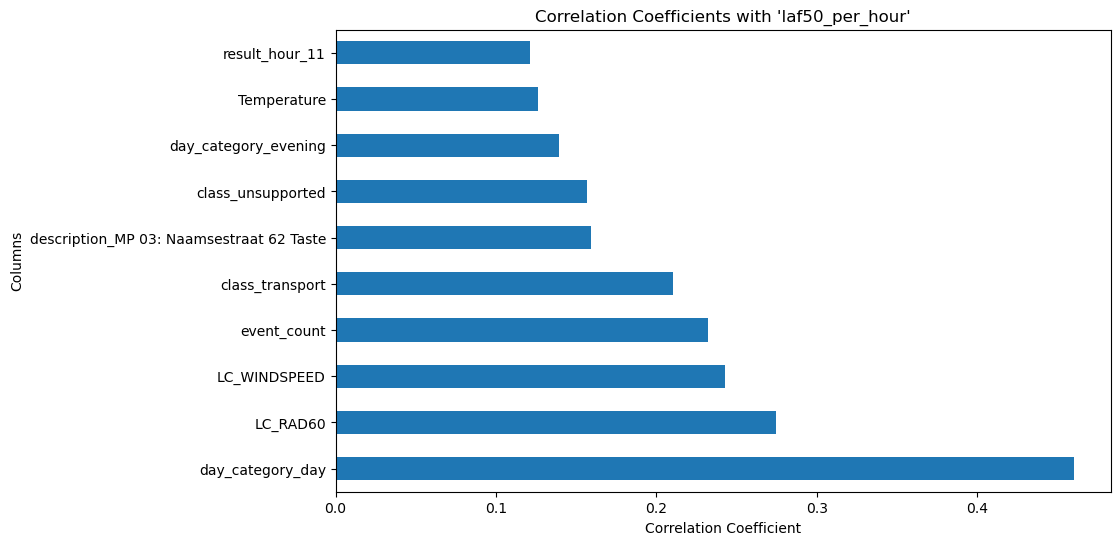

In [29]:
# Top 10 positive linearly correlated columns with Laf25
plt.figure(figsize=(10, 6))
correlation_data.head(10).plot(kind="barh")
plt.ylabel("Columns")
plt.xlabel("Correlation Coefficient")
plt.title("Correlation Coefficients with 'laf50_per_hour'")
plt.show()

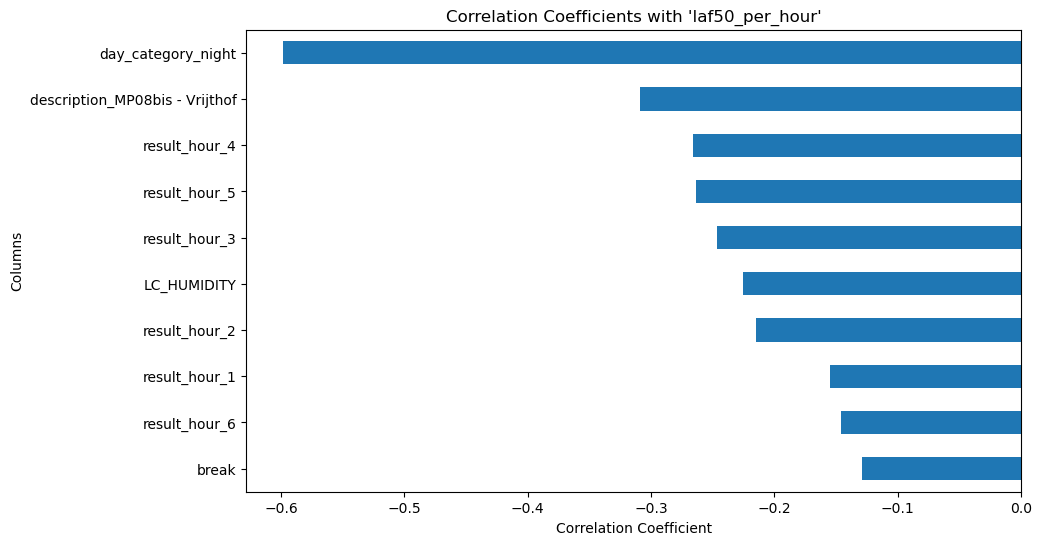

In [30]:
# Top 10 negative linearly correlated columns with Laf25
plt.figure(figsize=(10, 6))
correlation_data.tail(10).plot(kind="barh")
plt.ylabel("Columns")
plt.xlabel("Correlation Coefficient")
plt.title("Correlation Coefficients with 'laf50_per_hour'")
plt.show()